In [89]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import style
import datetime as dt
import yfinance as yf

In [90]:
style.use('ggplot')

In [91]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2023,5,8)

In [92]:
stocks = ["AAPL", "TSLA", 'AMZN', "KRE", 'SPY']
price = yf.download(stocks, start = start, end = end )
print(price.head(1000))

[*********************100%***********************]  5 of 5 completed
             Adj Close                                                 \
                  AAPL        AMZN        KRE         SPY        TSLA   
Date                                                                    
2018-01-02   40.888065   59.450500  51.666576  245.828445   21.368668   
2018-01-03   40.880943   60.209999  51.762909  247.383347   21.150000   
2018-01-04   41.070835   60.479500  52.043118  248.426025   20.974667   
2018-01-05   41.538437   61.457001  52.384655  250.081482   21.105333   
2018-01-08   41.384159   62.343498  52.288326  250.538910   22.427334   
...                ...         ...        ...         ...         ...   
2021-12-14  173.059845  169.091507  66.781532  452.638947  319.503326   
2021-12-15  177.993637  173.315002  67.301308  459.711487  325.329987   
2021-12-16  171.004913  168.871002  67.426437  455.657471  308.973328   
2021-12-17  169.893066  170.017502  65.790100  450.8079

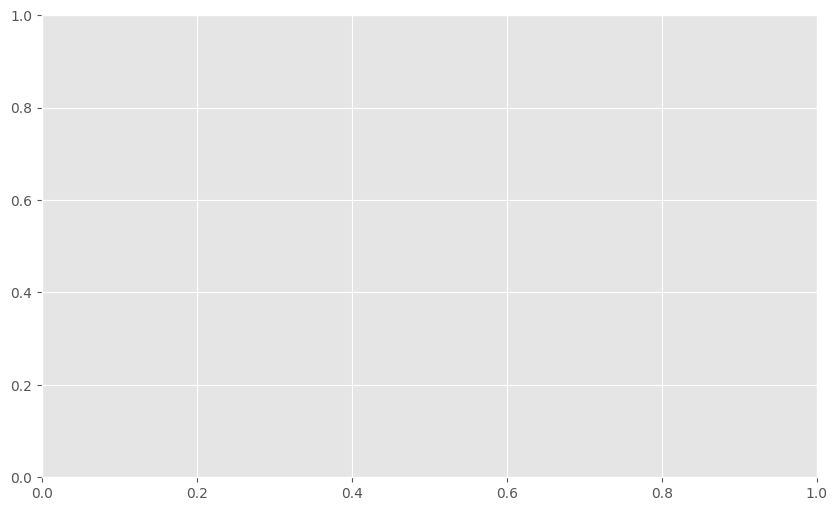

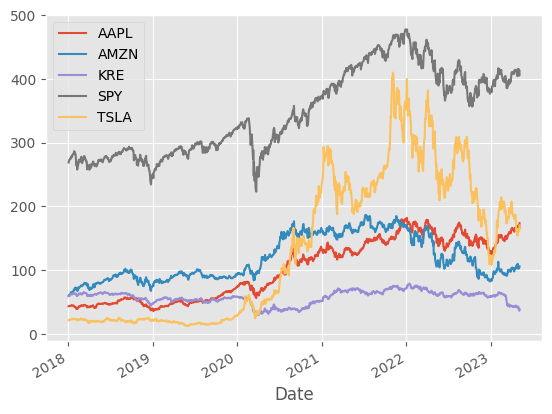

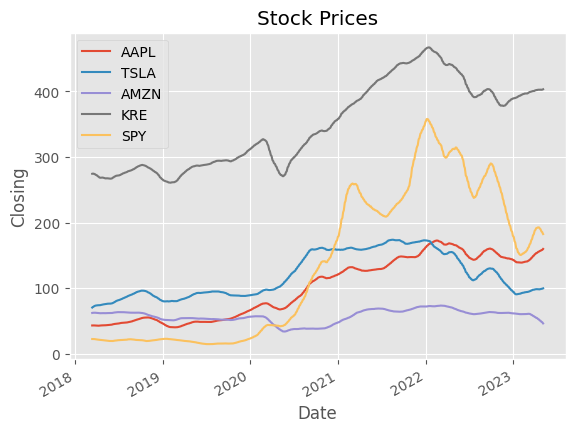

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True)
price['Close'].plot()
price['Close'].rolling(window=50).mean().plot(label = '50 day Moving Average')

price = price.loc['2020':]
plt.title("Stock Prices")
plt.xlabel('Date')
plt.ylabel('Closing')

plt.legend(stocks)
plt.show()